# Netflix_Data_Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('NetflixDataset.csv')
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
 df.shape

(7789, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


Q1. Is there is a duplicate records in this dataset ? if yes, then remove them

In [5]:
df.duplicated().sum()


2

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.shape


(7787, 11)

Q2. Is there is a null values in this data ? If yes then show it in the heatmap

In [8]:
df.isnull().sum()


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

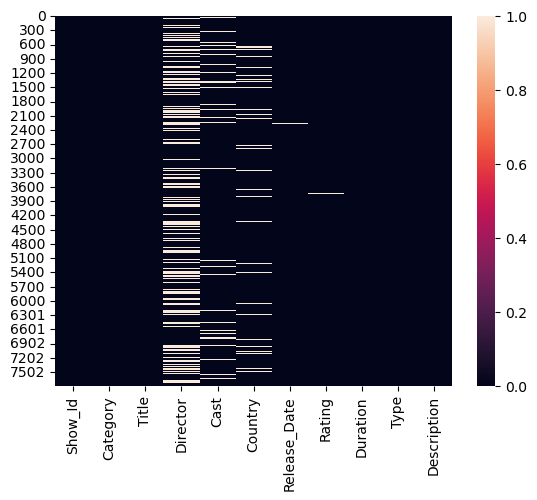

In [9]:
sns.heatmap(df.isnull())
plt.show()


Q3. For ‘93 Days’ movie what is the show_id and who is the director of this
movie ?



In [10]:
df.loc[df["Title"]=="Friends", ["Title","Show_Id","Director"]]

,Title,Show_Id,Director
2288,Friends,s2289,NaN


In [11]:
df[df['Title'].isin(['Friends'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


Q4. In which year highest number of TV shows and movies released ? show it in the
bar chart


In [12]:
df.dtypes # date column is in str format required to be change in date

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [13]:
df.Release_Date = pd.to_datetime(df.Release_Date)

In [14]:
df.Release_Date.dtype


dtype('<M8[ns]')

In [15]:
df.groupby(df.Release_Date.dt.year)["Show_Id"].count().sort_values(ascending=False)
# in 2019 highest number of movies and web series are released


Release_Date
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Show_Id, dtype: int64

<Axes: xlabel='Release_Date'>

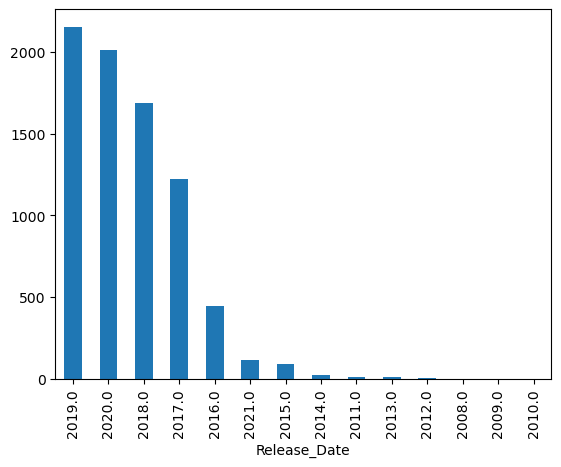

In [16]:
df.groupby(df.Release_Date.dt.year)["Show_Id"].count().sort_values(
ascending=False).plot.bar()


How many movies and shows are in the dataset? Show with the bar graph.

Q5. How many Movies and TV series are in the dataset ? Show it in bar chart


In [17]:
df["Category"].value_counts()


Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: >

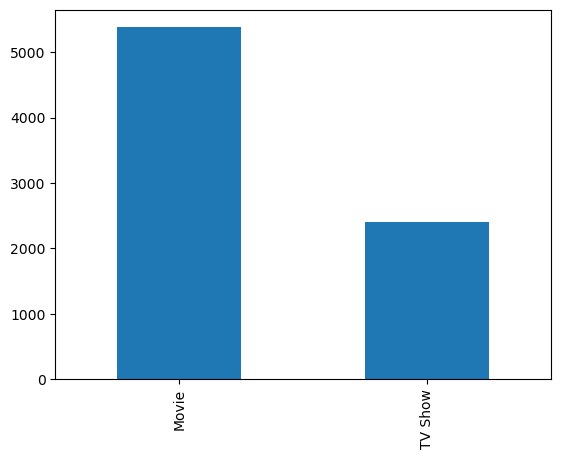

In [18]:
df["Category"].value_counts().plot.bar()
# Movies are double as compare to webseries because web series trend has emerged
# in recent 2-3 years


Q6. How all the ‘movies’ are made in year 2020 ?

In [19]:
# How all the ‘movies’ are made in year 2020 ?
len(df[(df["Category"]=="Movie") & (df["Release_Date"].dt.year==2020)])

1312

In [20]:
 print("Number of movies made in year 2020 ---->>>",len(df[(df["Category"]=="Movie") & (df["Release_Date"].dt.year==2020)]) )

Number of movies made in year 2020 ---->>> 1312


Q7. How many Titles are released in India only ?

In [21]:

len(df[df["Country"]=="India"])

923

In [22]:
print("Number of Titles released in India are",len(df[df["Country"]=="India"]))


Number of Titles released in India are 923


Q8. Top 10 directors who gave highest number of movies or web series

In [23]:

df["Director"].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

Q9. Show the records where ‘category is movie’ and ‘type is comedy’ or ‘country is
UK’

In [24]:
df[(df.Category=="Movie") & (df["Type"].str.contains("Comedies", case=False) |
(df["Country"]=="United Kingdom"))].head(15)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
19,s20,Movie,89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ..."
37,s38,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,2019-06-01,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin..."
39,s40,Movie,"¡Ay, mi madre!",Frank Ariza,"Estefanía de los Santos, Secun de la Rosa, Ter...",Spain,2019-07-19,TV-MA,81 min,"Comedies, International Movies","When her estranged mother suddenly dies, a wom..."
40,s41,Movie,Çarsi Pazar,Muharrem Gülmez,"Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem G...",Turkey,2017-03-10,TV-14,97 min,"Comedies, International Movies",The slacker owner of a public bath house ralli...
42,s43,Movie,Çok Filim Hareketler Bunlar,Ozan Açıktan,"Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Burc...",Turkey,2017-03-10,TV-MA,99 min,"Comedies, International Movies",Vignettes of the summer holidays follow vacati...
48,s49,Movie,10 Days in Sun City,Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...","South Africa, Nigeria",2019-10-18,TV-14,87 min,"Comedies, International Movies, Romantic Movies",After his girlfriend wins the Miss Nigeria pag...


Q10. In how many movies / tv shows “Shah Rukh Khan” was casted ?

In [25]:
len(df[df["Cast"].str.contains("Shah Rukh Khan", case=False, na=False)])


35

In [26]:
new_df = df.dropna()
new_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [27]:
new_df[new_df['Cast'].str.contains("Shah Rukh Khan")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
599,s600,Movie,Asoka,Santosh Sivan,"Shah Rukh Khan, Kareena Kapoor, Danny Denzongp...",India,2017-03-15,R,168 min,"Action & Adventure, Dramas, International Movies",This elaborate Bollywood epic dramatizes one m...
926,s927,Movie,Billu,Priyadarshan,"Irrfan Khan, Shah Rukh Khan, Lara Dutta, Rajpa...",India,2018-04-01,TV-PG,132 min,"Dramas, International Movies",An Indian village is abuzz with news that a ma...
1257,s1258,Movie,Chaahat,Mahesh Bhatt,"Naseeruddin Shah, Shah Rukh Khan, Pooja Bhatt,...",India,2017-05-01,TV-14,148 min,"Dramas, International Movies, Romantic Movies",A vulnerable singer is forced to choose betwee...
1265,s1266,Movie,Chalte Chalte,Aziz Mirza,"Shah Rukh Khan, Rani Mukerji, Jas Arora, Satis...",India,2018-07-01,TV-14,166 min,"Dramas, International Movies, Romantic Movies",Priya and Raj are polar opposites. Raj is bras...
1267,s1268,Movie,Chamatkar,Rajiv Mehra,"Shah Rukh Khan, Naseeruddin Shah, Urmila Maton...",India,2017-05-15,TV-14,164 min,"Comedies, International Movies, Sci-Fi & Fantasy",A village schoolteacher and the ghost of a mur...
1311,s1312,Movie,Chennai Express,Rohit Shetty,"Shah Rukh Khan, Deepika Padukone, Nikitin Dhee...",India,2018-08-31,TV-14,135 min,"Action & Adventure, Comedies, International Mo...",What could have been a sad journey turns joyfu...
1667,s1668,Movie,Dear Zindagi,Gauri Shinde,"Alia Bhatt, Shah Rukh Khan, Ira Dubey, Yashasw...",India,2017-04-25,TV-14,149 min,"Comedies, Dramas, International Movies",A young cinematographer with a bright professi...
1760,s1761,Movie,Dil Se,Mani Ratnam,"Shah Rukh Khan, Manisha Koirala, Preity Zinta,...",India,2018-03-01,TV-14,166 min,"Dramas, International Movies, Romantic Movies",A radio broadcaster's intense attraction to a ...
1764,s1765,Movie,Dilwale,Rohit Shetty,"Shah Rukh Khan, Kajol, Kriti Sanon, Kabir Bedi...",India,2017-02-01,TV-PG,154 min,"Action & Adventure, Dramas, International Movies","A young couple falls in love, but conflicting ..."
1807,s1808,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Arjun Rampal,...",India,2019-12-15,TV-14,169 min,"Action & Adventure, International Movies",A ruthless crime boss and drug lord is nabbed ...


In [28]:
new_df[new_df['Cast'].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


In [29]:
len(df[df["Cast"].str.contains("Tom Cruise", case=False, na=False)])


2

Q11. What are the different Ratings provided by netflix ?

In [30]:

print(df["Rating"].unique())


['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


Q12. How many movies got the ‘TV-14’ rating in ‘India’ ?


In [31]:
len(df[(df["Rating"]=='TV-14') & (df["Country"]=='India')])


520

Q13. How many movies get ‘R’ rating in year ‘2020’ ?

In [32]:
len(df[(df["Rating"]=='R') & (df["Release_Date"].dt.year==2020)])

199

Q14. What is the max duration of Movie/Show in this dataset ?

In [33]:
 df.Duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: Duration, Length: 216, dtype: int64

In [34]:
 df[["Minutes","Unit"]] = df["Duration"].str.split(" ", expand=True)
df[["Minutes","Unit"]].head()


,Minutes,Unit
0,4,Seasons
1,93,min
2,78,min
3,80,min
4,123,min


In [35]:
df["Minutes"].dtype

dtype('O')

In [36]:
df["Minutes"] = df["Minutes"].astype("int64")


In [37]:
df["Minutes"].dtype

dtype('int64')

In [38]:
print("The max duration in this dataset is ---->>>>",df["Minutes"].max(),"Minutes")


The max duration in this dataset is ---->>>> 312 Minutes


Q15. Which Individual Country has maximum number of TV Shows ?


In [39]:
df_tv = df[df["Category"]=="TV Show"]
df_tv["Country"].value_counts().sort_values(ascending=False).head(1)
# United States has most number of TV Shows


United States    705
Name: Country, dtype: int64

Q16. Find out the instances where category is ‘movie’ and type is ‘drama’ ?

In [40]:
 df[(df["Category"]=="Movie") & (df["Type"].str.contains("Drama", case=False))].head(15)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,103,min
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,149,min
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",144,min
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",124,min
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,110,min
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",128,min
22,s23,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,2018-09-15,TV-14,117 min,"Dramas, International Movies",A successful writer returns to the town that l...,117,min


In [41]:
df[(df["Category"]=="Movie") & (df["Type"] == "Action" ) | (df['Country'] == 'India')].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",118,min
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,143,min
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",124,min
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,110,min
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",128,min


In [42]:
 df[(df["Category"]=="Movie") & (df["Type"].str.contains("Comedy", case=False))].head(15)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,2013-11-01,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",44,min
305,s306,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,2019-06-18,TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,59,min
307,s308,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,2018-10-23,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San...",74,min
310,s311,Movie,Adel Karam: Live from Beirut,NaN,Adel Karam,United States,2018-03-01,TV-MA,59 min,Stand-Up Comedy,"From Casino du Liban, Lebanese actor and comed...",59,min
312,s313,Movie,Aditi Mittal: Things They Wouldn't Let Me Say,Fazila Allana,Aditi Mittal,India,2017-07-18,TV-MA,63 min,Stand-Up Comedy,Trailblazing comic Aditi Mittal mixes topical ...,63,min
320,s321,Movie,Afonso Padilha: Classless,"Junior Carelli, Rudge Campos",Afonso Padilha,Brazil,2020-09-03,TV-MA,63 min,Stand-Up Comedy,Brazilian comedian Afonso Padilha dives into h...,63,min
344,s345,Movie,Agustín Aristarán: Soy Rada,Mariano Baez,Agustín Aristarán,Argentina,2018-02-16,TV-MA,60 min,Stand-Up Comedy,"Argentine comedian Agustín ""Radagast"" Aristará...",60,min
370,s371,Movie,Alan Saldaña: Mi vida de pobre,"Raúl Campos, Jan Suter",Alan Saldaña,Mexico,2017-08-04,TV-MA,54 min,Stand-Up Comedy,Mexican comic Alan Saldaña has fun with everyt...,54,min
375,s376,Movie,Alejandro Riaño: Especial de stand up,NaN,Alejandro Riaño,Colombia,2018-01-10,TV-MA,60 min,Stand-Up Comedy,Colombian comedian Alejandro Riaño discusses t...,60,min
378,s379,Movie,Alex Fernández: The Best Comedian in the World,Alex Díaz,Alex Fernández,Mexico,2020-01-23,TV-MA,51 min,Stand-Up Comedy,Comic Alex Fernández performs his familiar aut...,51,min


Q17. Find out the instances where category is ‘TV Show’ and type is ‘Kids TV’ ?

In [43]:
 df[(df["Category"]=="TV Show") & (df["Type"].str.contains("Kids' TV",case=False))].head(15)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,2019-07-12,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2,Seasons
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2,Seasons
225,s226,TV Show,A Series of Unfortunate Events,NaN,"Neil Patrick Harris, Patrick Warburton, Malina...",United States,2019-01-01,TV-PG,3 Seasons,"Kids' TV, TV Action & Adventure, TV Comedies",The extraordinary Baudelaire orphans face tria...,3,Seasons
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,1,Season
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,2020-03-31,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",1,Season
380,s381,TV Show,Alexa & Katie,NaN,"Paris Berelc, Isabel May, Tiffani Thiessen, Em...",United States,2020-06-13,TV-G,4 Seasons,"Kids' TV, TV Comedies",Alexa is battling cancer. But with her best fr...,4,Seasons
396,s397,TV Show,Alien TV,NaN,"Rob Tinkler, Julie Lemieux, John Cleland, Kyle...",NaN,2020-08-21,TV-Y7,1 Season,"Kids' TV, TV Comedies","Alien reporters Ixbee, Pixbee and Squee travel...",1,Season
411,s412,TV Show,All Hail King Julien,NaN,"Danny Jacobs, Andy Richter, Henry Winkler, Kev...",United States,2017-12-01,TV-Y7,5 Seasons,"Kids' TV, TV Comedies",In this Emmy winner for Outstanding Children's...,5,Seasons
412,s413,TV Show,All Hail King Julien: Exiled,NaN,"Danny Jacobs, Andy Richter, Kevin Michael Rich...",NaN,2017-05-12,TV-Y7,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","Julien's been dethroned, but loyal friends and...",1,Season
434,s435,TV Show,Alphablocks,NaN,"Teresa Gallagher, David Holt, Lizzie Waterworth",United Kingdom,2020-05-25,TV-Y,5 Seasons,Kids' TV,The letters of the alphabet come to life in Al...,5,Seasons


In [44]:
country_with_highest_no_of_tv_shows = new_df[new_df['Category']=='TV Show']
country_with_highest_no_of_tv_shows.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,2020-11-11,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,2018-03-09,TV-14,1 Season,"Anime Series, International TV Shows",Everything Aiko knew was a lie. Now she's join...
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...


In [45]:
country_with_highest_no_of_tv_shows.Country.value_counts().head()

United States     27
United Kingdom    19
Japan             10
South Korea       10
Spain              7
Name: Country, dtype: int64

<Axes: >

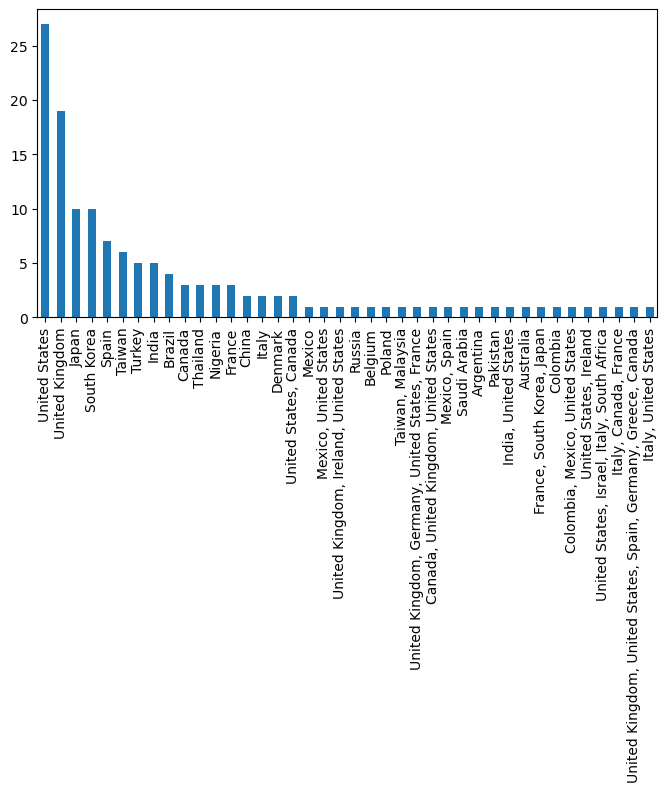

In [46]:
plt.figure(figsize=[8,4])
country_with_highest_no_of_tv_shows.Country.value_counts().plot(kind='bar')